In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Dense, Activation, Dropout
from sklearn.preprocessing import LabelEncoder

In [63]:
path  = 'KAGGLE/DATASET-balanced.csv'

In [64]:
data = pd.read_csv(path)

In [65]:
len(data.columns)

27

In [66]:
numerical_columns = data.select_dtypes(include=[np.number]).columns[:-1]

In [67]:
scaler = StandardScaler()

# Normalize the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [68]:
X = data.drop("LABEL", axis=1)
y = data["LABEL"]


In [69]:
le = LabelEncoder()
y = le.fit_transform(y)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [71]:
model = Sequential()
model.add(Dense(512 , input_shape = (X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [72]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:]))) #, X_train.shape[1], 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

In [73]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               13824     
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14337 (56.00 KB)
Trainable params: 14337 (56.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
295/295 [==============================] - 2s 3ms/step - loss: 0.2199 - accuracy: 0.9217 - val_loss: 0.0804 - val_accuracy: 0.9813
Epoch 2/10
295/295 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9779 - val_loss: 0.0459 - val_accuracy: 0.9890
Epoch 3/10
295/295 [==============================] - 1s 2ms/step - loss: 0.0551 - accuracy: 0.9837 - val_loss: 0.0347 - val_accuracy: 0.9898
Epoch 4/10
295/295 [==============================] - 1s 2ms/step - loss: 0.0436 - accuracy: 0.9869 - val_loss: 0.0314 - val_accuracy: 0.9898
Epoch 5/10
295/295 [==============================] - 1s 3ms/step - loss: 0.0358 - accuracy: 0.9892 - val_loss: 0.0264 - val_accuracy: 0.9907
Epoch 6/10
295/295 [==============================] - 1s 3ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0241 - val_accuracy: 0.9915
Epoch 7/10
295/295 [==============================] - 1s 2ms/step - loss: 0.0263 - accuracy: 0.9921 - val_loss: 0.0218 - val_accuracy: 0.9941
Epoch 

In [84]:
y_pred = model.predict(X_test)

37/37 [==============================] - 0s 2ms/step


In [85]:
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1, 0)

In [86]:


# Calculate accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Create a confusion matrix (optional)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.9941
Precision: 0.9950
Recall: 0.9934
F1-score: 0.9942
[[573   3]
 [  4 598]]


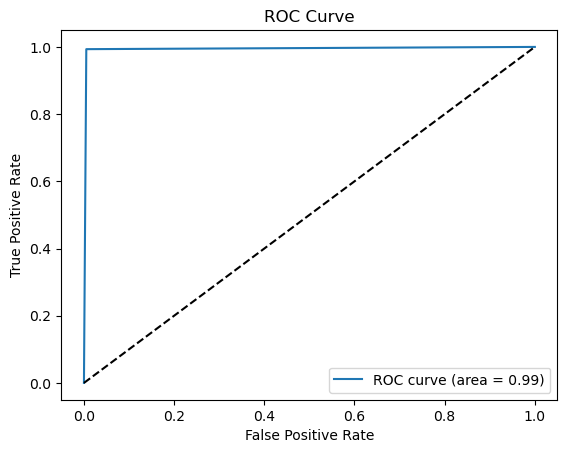

In [87]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [88]:
data.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,-1.208702,-0.354333,0.116009,1.459052,0.734064,-0.757703,-1.000217,-1.512838,1.578694,0.121693,...,-0.339665,0.499818,-0.961925,0.286917,1.135411,-0.362406,0.818087,-0.455699,-6.779060,FAKE
1,0.314760,-0.002000,-0.359115,0.453413,-0.558816,-0.587688,-0.337368,-0.682773,0.632521,-0.720502,...,0.349022,-1.018972,0.139881,0.597495,-0.671444,0.263303,0.273190,-1.368420,-8.494421,FAKE
2,-1.720702,0.665616,-0.024574,-0.216879,-0.120276,0.242328,0.798671,-0.678864,0.002675,0.114762,...,-0.213756,-0.403598,-0.845170,-0.511283,-0.787327,0.505927,0.301427,-0.235670,-7.033001,FAKE
3,-1.469869,-0.227649,-0.447672,0.519898,-0.543290,-0.601686,-0.277352,-0.241396,0.974044,-1.121839,...,0.384223,-0.075906,-0.947849,-0.139852,1.039752,0.748806,-0.460172,-0.181725,-3.274857,FAKE
4,-0.026953,-0.774354,-0.181054,0.060030,0.021870,-0.481429,-0.350994,0.212095,0.232011,1.364897,...,0.376055,0.482007,1.560651,1.866382,1.630892,1.342118,1.152252,0.193785,-5.060998,FAKE


In [89]:
X_train.shape

(9422, 26)

In [91]:
y_train.shape

(9422,)